In [1]:
#https://github.com/omartinsky/HJM/blob/main/hjm.ipynb
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import copy as copylib
#from progressbar import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib.ticker import LinearLocator
#from matplotlib.animation import FuncAnimation
#from matplotlib.widgets import Slider
import scipy
from scipy.optimize import minimize
#%pylab

#pylab.rcParams['figure.figsize']=(16,4.5)
np.random.seed(0)

In [2]:
plt.rcParams.update({
    'text.usetex' : True,
    "font.family": "serif",
    "font.monospace": 'Computer Modern'
})
plt.rcParams['lines.linewidth']=1
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
dataframe = pd.read_csv('hjm_data.csv').set_index('time')/100
pd.options.display.max_rows = 10
display(dataframe)

1/12       1/2         1       1.5         2       2.5         3  \
time                                                                         
1     0.057734  0.064382  0.067142  0.066512  0.064991  0.063255  0.061534   
2     0.057680  0.064506  0.067502  0.066842  0.065423  0.063852  0.062301   
3     0.057758  0.064410  0.067354  0.066845  0.065577  0.064109  0.062611   
4     0.057430  0.064103  0.066942  0.066215  0.064904  0.063462  0.062006   
5     0.057412  0.063978  0.066358  0.065502  0.064168  0.062722  0.061262   
...        ...       ...       ...       ...       ...       ...       ...   
1260  0.046421  0.045093  0.042471  0.042081  0.042663  0.043224  0.043640   
1261  0.046233  0.044976  0.042452  0.042131  0.042726  0.043285  0.043699   
1262  0.046348  0.045311  0.043295  0.043266  0.043963  0.044565  0.045003   
1263  0.046327  0.045347  0.043184  0.043144  0.043859  0.044482  0.044941   
1264  0.046138  0.045251  0.042916  0.042833  0.043498  0.044054  0.044440   

           3.5         4       4.5  ...      20.5        21      21.5  \
time                                ...                                 
1     0.059925  0.058444  0.057058  ...  0.034194  0.034772  0.035371   
2     0.060846  0.059490  0.058198  ...  0.033790  0.034437  0.035108   
3     0.061164  0.059782  0.058438  ...  0.032706  0.033294  0.033907   
4     0.060601  0.059252  0.057933  ...  0.031325  0.031891  0.032486   
5     0.059849  0.058488  0.057157  ...  0.030119  0.030667  0.031250   
...        ...       ...       ...  ...       ...       ...       ...   
1260  0.043940  0.044156  0.044314  ...  0.040260  0.040098  0.039950   
1261  0.043998  0.044214  0.044374  ...  0.040307  0.040147  0.039999   
1262  0.045323  0.045560  0.045739  ...  0.041276  0.041118  0.040972   
1263  0.045279  0.045530  0.045721  ...  0.041135  0.040981  0.040841   
1264  0.044708  0.044903  0.045057  ...  0.040665  0.040501  0.040353   

            22      22.5        23      23.5        24      24.5        25  
time                                                                        
1     0.035985  0.036612  0.037252  0.037902  0.038562  0.039231  0.039908  
2     0.035798  0.036504  0.037224  0.037959  0.038705  0.039461  0.040227  
3     0.034539  0.035188  0.035853  0.036533  0.037224  0.037927  0.038639  
4     0.033106  0.033748  0.034409  0.035088  0.035784  0.036493  0.037214  
5     0.031862  0.032499  0.033161  0.033844  0.034546  0.035264  0.035997  
...        ...       ...       ...       ...       ...       ...       ...  
1260  0.039813  0.039687  0.039571  0.039464  0.039365  0.039273  0.039187  
1261  0.039863  0.039737  0.039621  0.039514  0.039414  0.039320  0.039233  
1262  0.040840  0.040718  0.040607  0.040505  0.040411  0.040324  0.040244  
1263  0.040714  0.040599  0.040495  0.040400  0.040314  0.040235  0.040163  
1264  0.040219  0.040098  0.039989  0.039891  0.039802  0.039721  0.039648  

[1264 rows x 51 columns]

In [4]:
hist_timeline = list(dataframe.index)
tenors = [eval(x) for x in dataframe.columns]
hist_rates = np.matrix(dataframe)
display(hist_rates
        #,tenors
       )

matrix([[0.05773355, 0.06438191, 0.06714223, ..., 0.03856237, 0.03923121,
         0.03990752],
        [0.05768002, 0.06450607, 0.06750178, ..., 0.03870473, 0.03946143,
         0.04022723],
        [0.05775773, 0.06440977, 0.06735365, ..., 0.03722432, 0.03792711,
         0.03863944],
        ...,
        [0.0463478 , 0.04531119, 0.04329511, ..., 0.04041119, 0.04032414,
         0.04024353],
        [0.04632742, 0.04534663, 0.0431835 , ..., 0.04031376, 0.04023491,
         0.04016286],
        [0.04613836, 0.04525117, 0.04291581, ..., 0.03980205, 0.03972144,
         0.03964844]])

<IPython.core.display.Javascript object>


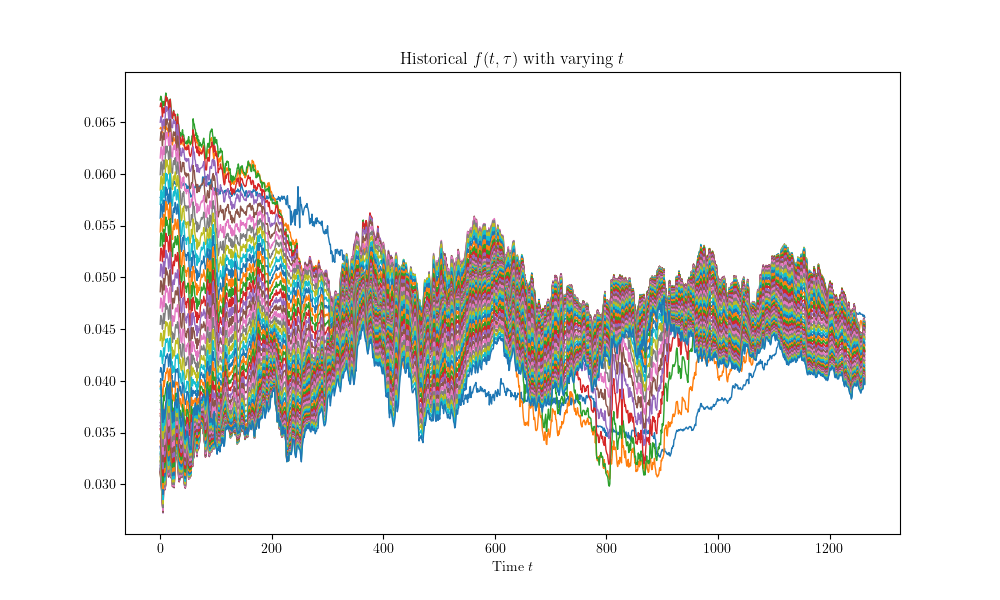

In [5]:
fig = plt.figure()
plt.plot(hist_rates, linewidth=1)
plt.xlabel(r'Time $t$')
plt.title(r'Historical $f(t,\tau)$ with varying $t$')
plt.savefig('ForwardRatesField_time_Visualization',dpi=400)
plt.show()

<IPython.core.display.Javascript object>


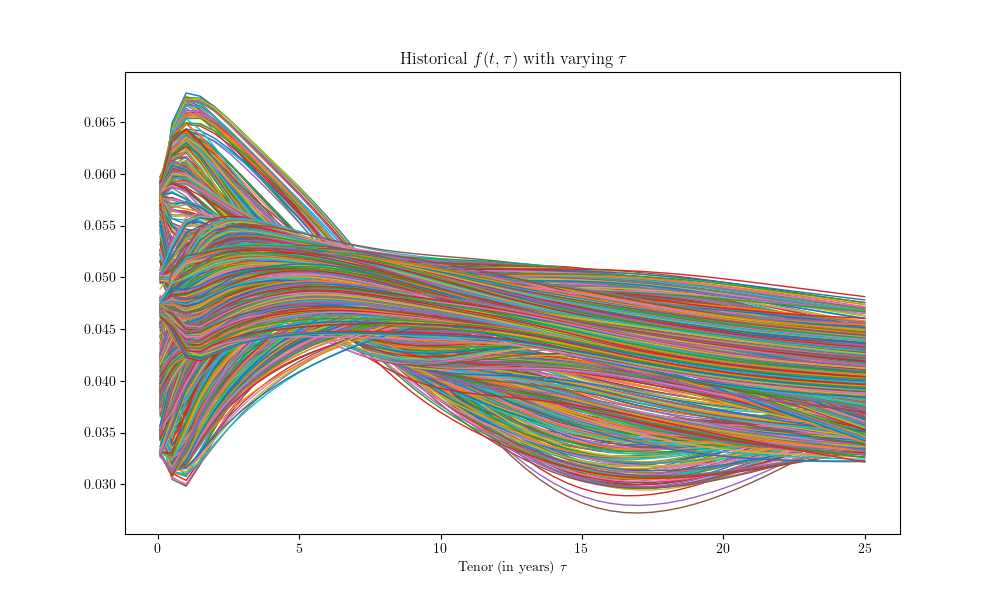

In [6]:
fig = plt.figure()
plt.plot(tenors, hist_rates.transpose())
plt.xlabel(r'Tenor (in years) $\tau$')
plt.title(r'Historical $f(t,\tau)$ with varying $\tau$')
plt.show()

<IPython.core.display.Javascript object>


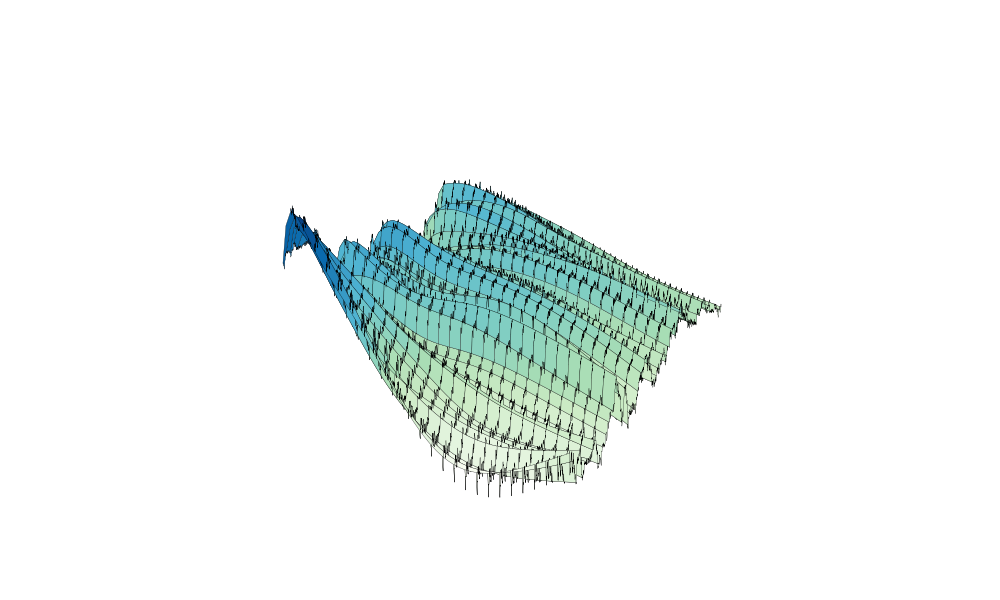

In [12]:
#Set up vectors for surface plot
z_vals = hist_rates #np.squeeze(np.asarray(hist_rates))
y_vals = np.linspace(1,1264,len(z_vals))/252
x_vals = np.array(tenors)

fig = plt.figure()

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals

X,Y=np.meshgrid(x,y)

ax.set_xlabel('Tenors (in years)',size=20)
ax.set_ylabel('Time (in years)',size=20)
ax.set_zlabel('Forward Rates',size=20)
#ax.set_title(r'Forward Rates $f(t,\tau)$ for varying $t$ and $\tau$',size=25)

surf = ax.plot_surface(X,Y,z,cmap=cm.GnBu, edgecolors='k', lw=0.2)

ax.set_axis_off()
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('ForwardRatesFieldVisualization_without_axis', dpi=400) 

We now compute daily changes $\delta f(t,\theta)\equiv f(t+\epsilon,\theta)-f(t,\theta)$.

__IMPORTANT NOTE__: The data provided here is already of the form $f(t,\theta)$, where $0\leq\theta\equiv x-t$ is a period in time (i.e. a duration).

In [278]:
daily_changes = np.zeros((hist_rates.shape[0]-1,hist_rates.shape[1]))

for i in range(daily_changes.shape[0]):
    for j in range(daily_changes.shape[1]):
        daily_changes[i,j]=hist_rates[i+1,j]-hist_rates[i,j]
        
display(daily_changes)

array([[-5.35342100e-05,  1.24166900e-04,  3.59546920e-04, ...,
         1.42366970e-04,  2.30220370e-04,  3.19708300e-04],
       [ 7.77080600e-05, -9.63044000e-05, -1.48127260e-04, ...,
        -1.48041707e-03, -1.53431687e-03, -1.58779011e-03],
       [-3.27239240e-04, -3.06464580e-04, -4.11876290e-04, ...,
        -1.44070696e-03, -1.43425956e-03, -1.42534369e-03],
       ...,
       [ 1.14648810e-04,  3.34843340e-04,  8.43050730e-04, ...,
         9.97488500e-04,  1.00371323e-03,  1.01026118e-03],
       [-2.03793900e-05,  3.54394900e-05, -1.11601760e-04, ...,
        -9.74376700e-05, -8.92340900e-05, -8.06706400e-05],
       [-1.89059630e-04, -9.54592800e-05, -2.67699560e-04, ...,
        -5.11702010e-04, -5.13469920e-04, -5.14417150e-04]])

We can calculate the following quantities:

$$V(\theta)=\sqrt{\langle[\delta f(t,\theta)]^2\rangle}$$

$$C(\theta)=\frac{\langle \delta f(t,\theta_{min})[\delta f(t,\theta)-\delta f(t,\theta_{min}]\rangle}{\langle[\delta f(t,\theta_{min}]^2\rangle}$$

$$R(\theta)=\frac{V(\theta)}{1+C(\theta)}$$

In [279]:
V = [np.sqrt(np.mean(daily_changes[:,theta]**2)) for theta in range(len(tenors))]

C = [np.mean(daily_changes[:,0]*(daily_changes[:,theta]-daily_changes[:,0]))/np.mean(daily_changes[:,0]**2)
     for theta in range(len(tenors))]

R = [V[theta]/(1+C[theta]) for theta in range(len(tenors))]

<IPython.core.display.Javascript object>


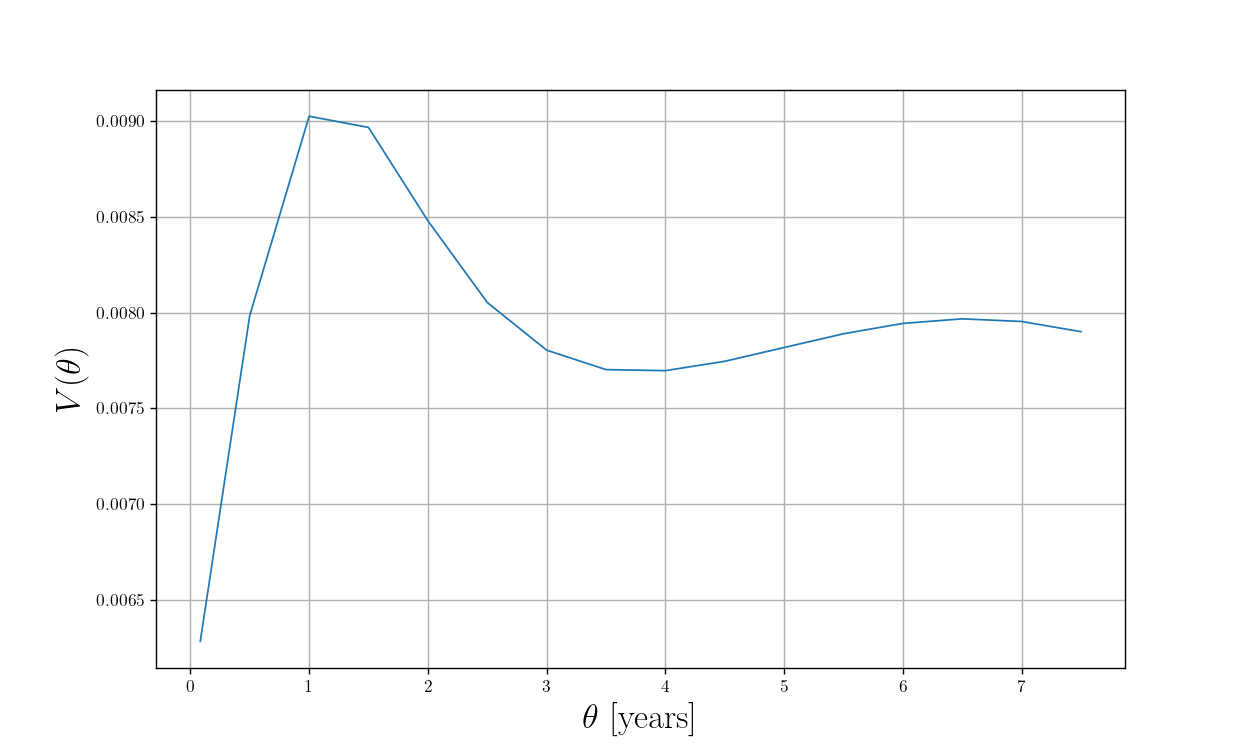

In [280]:
fig = plt.figure()

plt.plot(tenors[0:16],[V[i]*np.sqrt(252) for i in range(0,16)])
#plt.plot(tenors, C)
#plt.plot(tenors, R)
#plt.legend([r'$V(\theta)$', r'$C(\theta)$', r'$R(\theta)$'])
plt.xlabel(r'$\theta$ [years]', size=20)
plt.ylabel(r'$V(\theta)$', size=20)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


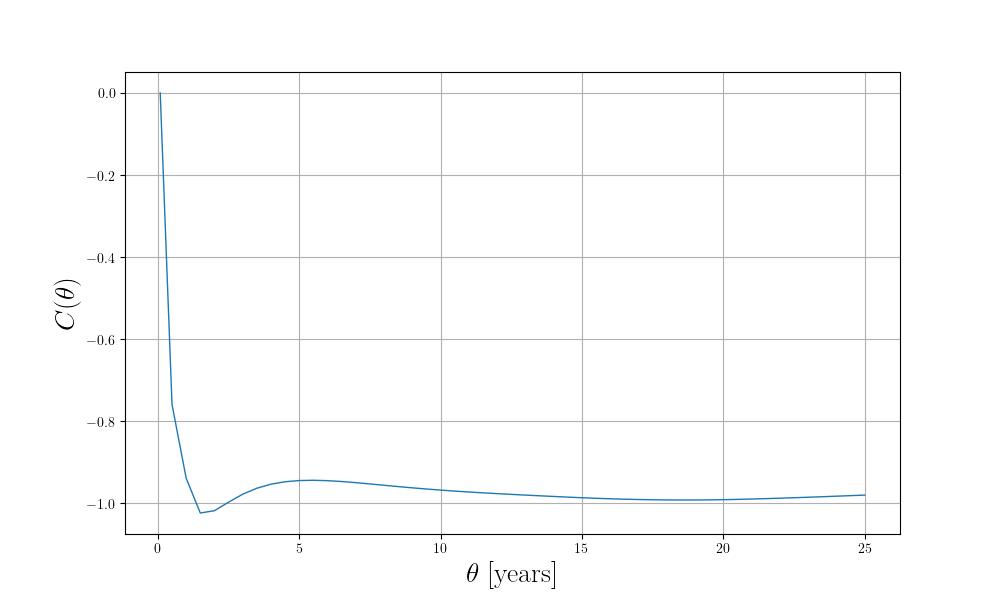

In [212]:
fig = plt.figure()

plt.plot(tenors, C)
#plt.plot(tenors, R)
#plt.legend([r'$V(\theta)$', r'$C(\theta)$', r'$R(\theta)$'])
plt.xlabel(r'$\theta$ [years]', size=20)
plt.ylabel(r'$C(\theta)$', size=20)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


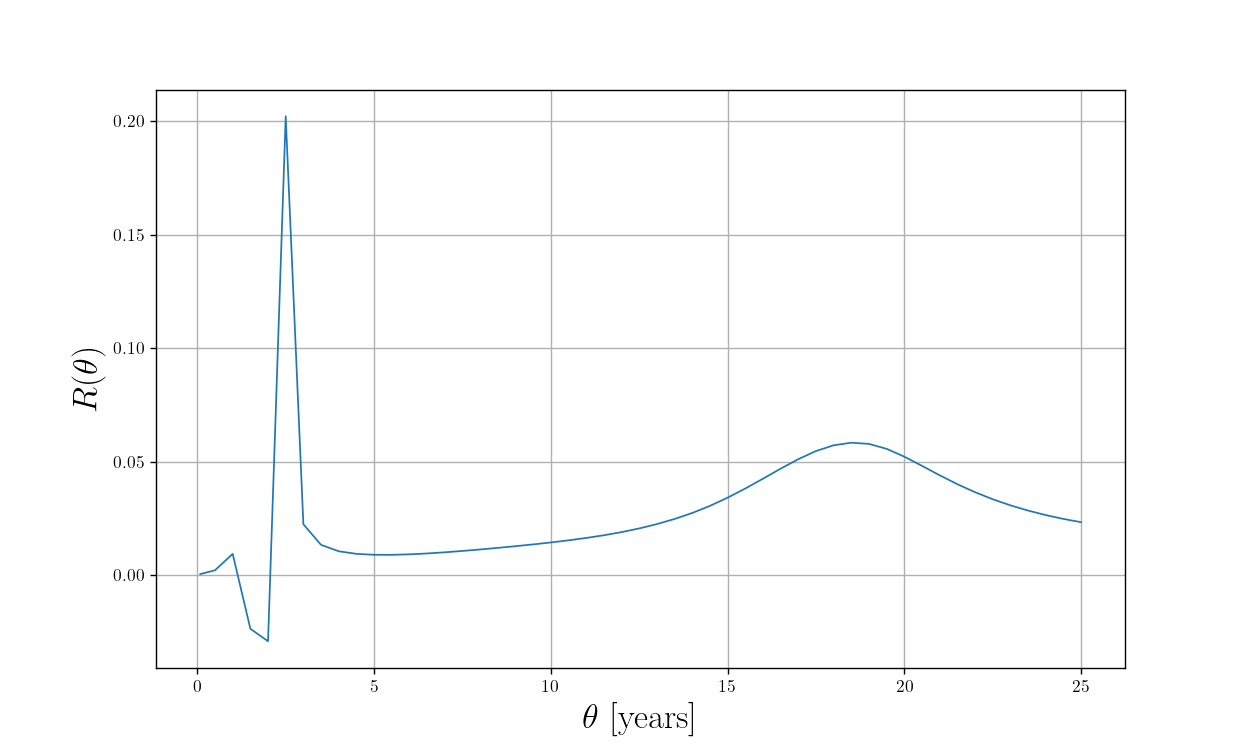

In [281]:
fig = plt.figure()

plt.plot(tenors, R)
#plt.legend([r'$V(\theta)$', r'$C(\theta)$', r'$R(\theta)$'])
plt.xlabel(r'$\theta$ [years]', size=20)
plt.ylabel(r'$R(\theta)$', size=20)
plt.grid(True)
plt.show()

We can also calculate the covariance

$$\langle\delta f(t,\theta)\delta f(t,\theta')\rangle_c = \langle\delta f(t,\theta)\delta f(t,\theta')\rangle-\langle\delta f(t,\theta)\rangle\langle\delta f(t,\theta')\rangle$$

In [282]:
covariance = np.zeros((len(tenors),len(tenors)))

for i in range(covariance.shape[0]):
    for j in range(covariance.shape[1]):
        covariance[i,j]=np.mean(daily_changes[:,i]*daily_changes[:,j])-np.mean(daily_changes[:,i])*np.mean(daily_changes[:,j])
        
display(covariance)

array([[1.56537611e-07, 3.75980171e-08, 9.39298800e-09, ...,
        2.69175188e-09, 2.89459196e-09, 3.10172169e-09],
       [3.75980171e-08, 2.52798364e-07, 2.19393298e-07, ...,
        4.95809349e-08, 5.14641660e-08, 5.33742661e-08],
       [9.39298800e-09, 2.19393298e-07, 3.22937592e-07, ...,
        8.95862241e-08, 9.20750355e-08, 9.46109106e-08],
       ...,
       [2.69175188e-09, 4.95809349e-08, 8.95862241e-08, ...,
        2.04671353e-07, 2.06138124e-07, 2.07585406e-07],
       [2.89459196e-09, 5.14641660e-08, 9.20750355e-08, ...,
        2.06138124e-07, 2.08140193e-07, 2.10133868e-07],
       [3.10172169e-09, 5.33742661e-08, 9.46109106e-08, ...,
        2.07585406e-07, 2.10133868e-07, 2.12685844e-07]])

<IPython.core.display.Javascript object>


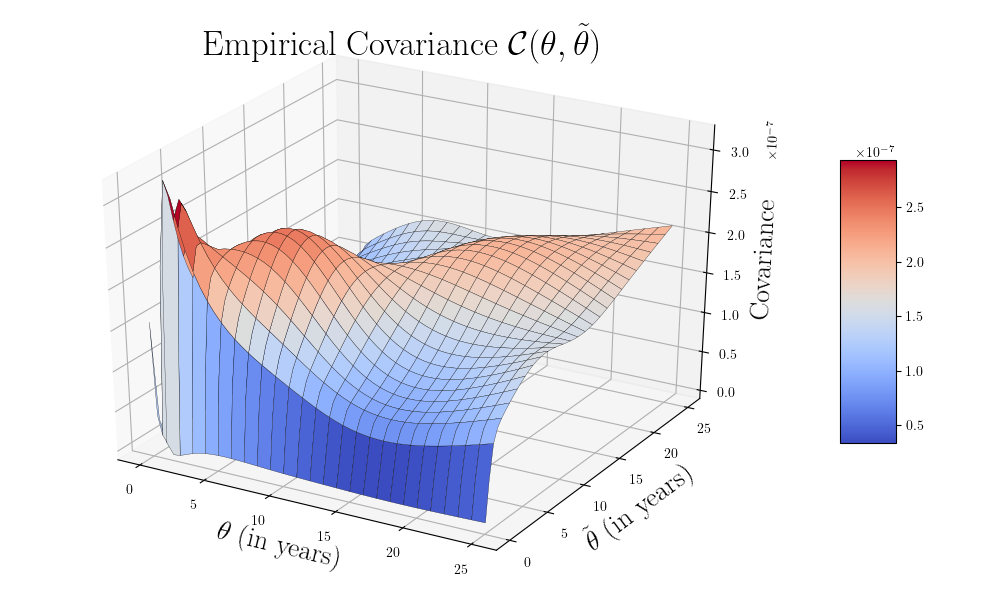

In [215]:
#Set up vectors for surface plot
z_vals = covariance
y_vals = np.array(tenors)
x_vals = np.array(tenors)

fig = plt.figure()

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals

X,Y=np.meshgrid(x,y)

ax.set_xlabel(r'$\theta$ (in years)',size=20)
ax.set_ylabel(r'$\tilde{\theta}$ (in years)',size=20)
ax.set_zlabel('Covariance',size=20)
ax.set_title(r'Empirical Covariance $\mathcal{C}(\theta,\tilde{\theta})$',size=25)

surf = ax.plot_surface(X,Y,z,cmap=cm.coolwarm, 
                       Linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('EmpiricalCovarianceVisualization', dpi=400) 

Normalizing this as
$$\mathcal{C}(\theta,\tilde{\theta})=\frac{\langle\delta f(t,\theta)\delta f(t,\tilde{\theta})\rangle_c}{\sqrt{\langle[\delta f(t,\theta)]^2\rangle_c}\sqrt{\langle[\delta f(t,\tilde{\theta})]^2\rangle_c}}$$

In [283]:
normalized_correlation = np.zeros(covariance.shape)

for i in range(normalized_correlation.shape[0]):
    for j in range(normalized_correlation.shape[1]):
        normalized_correlation[i,j]=covariance[i,j]/(np.sqrt(covariance[i,i])*np.sqrt(covariance[j,j]))
        
display(normalized_correlation)

array([[1.        , 0.1890029 , 0.04177679, ..., 0.01503824, 0.01603615,
        0.01699903],
       [0.1890029 , 1.        , 0.76785095, ..., 0.21797117, 0.22435711,
        0.23018419],
       [0.04177679, 0.76785095, 1.        , ..., 0.34846038, 0.35514411,
        0.36100451],
       ...,
       [0.01503824, 0.21797117, 0.34846038, ..., 1.        , 0.99873855,
        0.99494482],
       [0.01603615, 0.22435711, 0.35514411, ..., 0.99873855, 1.        ,
        0.99873159],
       [0.01699903, 0.23018419, 0.36100451, ..., 0.99494482, 0.99873159,
        1.        ]])

<IPython.core.display.Javascript object>


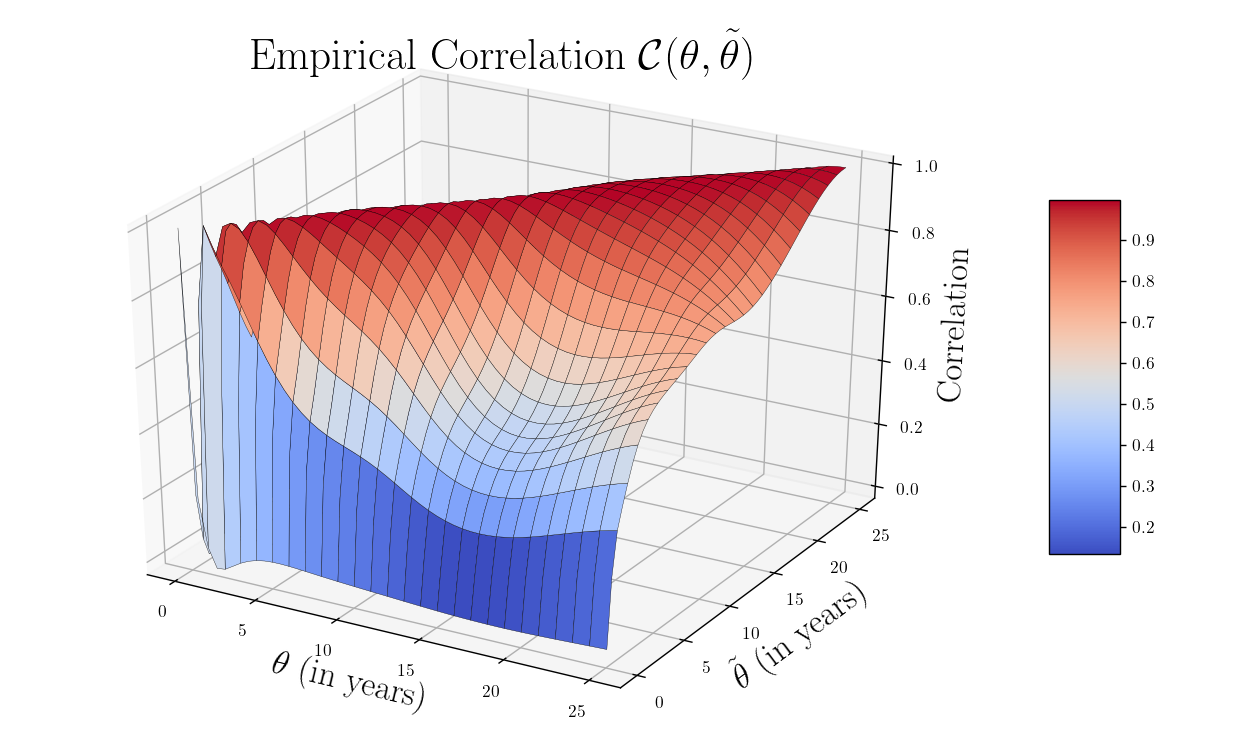

In [284]:
#Set up vectors for surface plot
z_vals = normalized_correlation
y_vals = np.array(tenors)
x_vals = np.array(tenors)

fig = plt.figure()

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals

X,Y=np.meshgrid(x,y)

ax.set_xlabel(r'$\theta$ (in years)',size=20)
ax.set_ylabel(r'$\tilde{\theta}$ (in years)',size=20)
ax.set_zlabel('Correlation',size=20)
ax.set_title(r'Empirical Correlation $\mathcal{C}(\theta,\tilde{\theta})$',size=25)

surf = ax.plot_surface(X,Y,z,cmap=cm.coolwarm, 
                       Linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('EmpiricalCorrelationVisualization', dpi=400) 

We can now compare this to the correlation functions of the field theory

$$\mathcal{C}_{\text{FT}}=\frac{D(\theta,\tilde{\theta})}{\sqrt{D(\theta,\theta)D(\tilde{\theta},\tilde{\theta})}}$$

Note that the functions defined in the cell below take arguments $x,y$ and $t$ where $t\leq x,y$ are all __MOMENTS IN TIME__ and __NOT__ durations or periods in time (i.e. $\theta=x-t$ and $\tilde{\theta}=y-t$)

In [285]:
def D(x,y,t,mu):
    return mu/2*(np.exp(-mu*(x+y-2*t))+np.exp(-mu*(abs(x-y))))

def D_norm(x,y,t,mu):
    normalisation_factor = (mu/2*(np.exp(-2*mu*(x-t))+1))**(-1/2)*(mu/2*(np.exp(-2*mu*(y-t))+1))**(-1/2)
    return mu/2*(np.exp(-mu*(x+y-2*t))+np.exp(-mu*(abs(x-y))))*normalisation_factor

def D_TFR(x,y,t,T_FR,mu):
    return mu*(math.cosh(mu*(T_FR-abs(x-y)))+math.cosh(mu*(T_FR-(x+y-2*t))))/(2*math.sinh(mu*T_FR))

def D_TFR_norm(x,y,t,T_FR,mu):
    normalisation_factor = (mu*(math.cosh(mu*T_FR)+math.cosh(mu*(T_FR-2*(x-t))))/(2*math.sinh(mu*T_FR)))**(-1/2)*(mu*(math.cosh(mu*T_FR)+math.cosh(mu*(T_FR-2*(y-t))))/(2*math.sinh(mu*T_FR)))**(-1/2)
    return mu*(math.cosh(mu*(T_FR-abs(x-y)))+math.cosh(mu*(T_FR-(x+y-2*t))))/(2*math.sinh(mu*T_FR))*normalisation_factor

So when we want to calculate the propagator using the given data and the above defined function we must use as input for $x$ and $y$ the sum $\text{tenor value}+t$

In [286]:
t=1200/252
T_FR = 100
mu = 0.04
z_vals_TFR_norm = np.matrix([[D_TFR_norm(x_vals[i]+t,y_vals[j],t,T_FR,mu) for i in range(len(x_vals))] for j in range(len(y_vals))])
z_vals_normalized = np.matrix([[D_norm(x_vals[i]+t,y_vals[j]+t,t,mu) for i in range(len(x_vals))] for j in range(len(y_vals))])

<IPython.core.display.Javascript object>


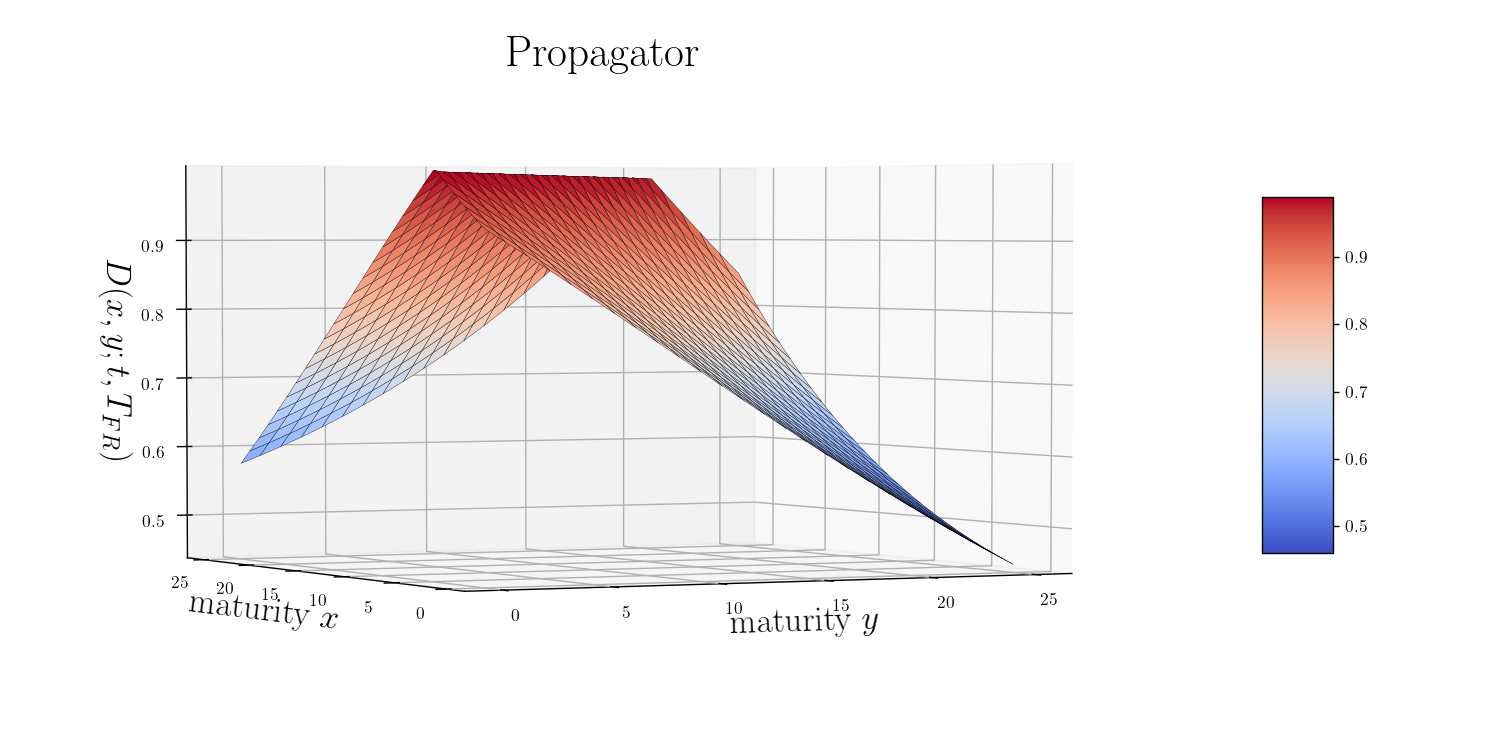

In [287]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals_TFR_norm

X,Y=np.meshgrid(x,y)

ax.set_xlabel('maturity $y$',size=20)
ax.set_ylabel('maturity $x$',size=20)
ax.set_zlabel(r'$D(x,y;t,T_{FR})$',size=20)
ax.set_title(r'Propagator',size=25)

surf = ax.plot_surface(X,Y,z, cmap=cm.coolwarm, 
                       Linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Normalised_Propagator_T_FR_Visualization_tenors', dpi=400)  

<IPython.core.display.Javascript object>


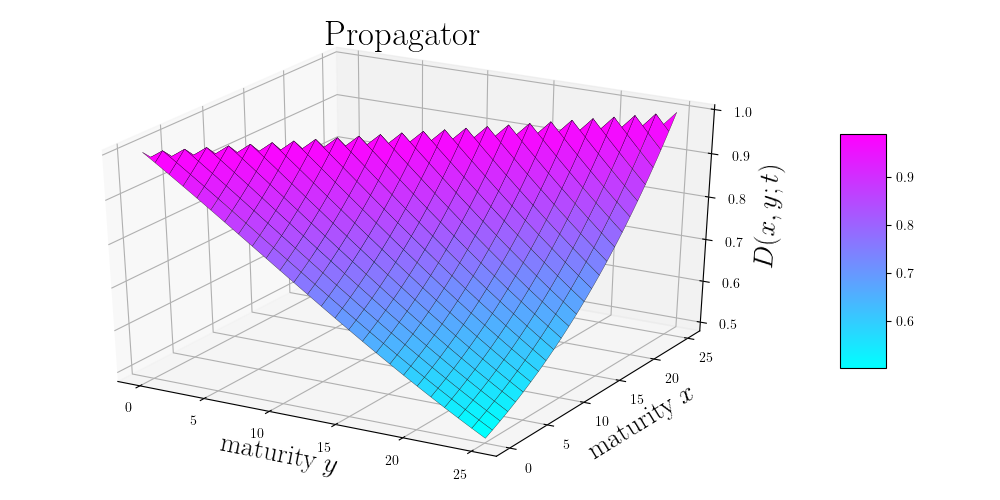

In [233]:
fig = plt.figure(figsize=(10,5))

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals_normalized

X,Y=np.meshgrid(x,y)

ax.set_xlabel('maturity $y$',size=20)
ax.set_ylabel('maturity $x$',size=20)
ax.set_zlabel(r'$D(x,y;t)$',size=20)
ax.set_title(r'Propagator',size=25)

surf = ax.plot_surface(X,Y,z, cmap=cm.cool, 
                       Linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Normalized_PropagatorVisualization_tenors', dpi=400)  

We can now try to minimize the RMSE between market correlation and field theory correlation by finding the optimal value for $\mu$.

In [288]:
def RMSE(A,B):
    # A,B are matrices of equal shape
    MSE = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            #print(i,j)
            MSE += (A[i,j]-B[i,j])**2/np.size(A)
            
    return np.sqrt(MSE)

In [289]:
field_correlation_matrix = lambda mu : np.array([[D_norm(tenors[i]+t,tenors[j]+t,t,mu) for i in range(len(tenors))] for j in range(len(tenors))])
field_correlation_matrix(0.04)

array([[1.        , 0.99160489, 0.98144388, ..., 0.50653568, 0.49775492,
        0.48908403],
       [0.99160489, 1.        , 0.98975296, ..., 0.5108241 , 0.501969  ,
        0.4932247 ],
       [0.98144388, 0.98975296, 1.        , ..., 0.51611273, 0.50716595,
        0.49833112],
       ...,
       [0.50653568, 0.5108241 , 0.51611273, ..., 1.        , 0.98266508,
        0.96554705],
       [0.49775492, 0.501969  , 0.50716595, ..., 0.98266508, 1.        ,
        0.98258   ],
       [0.48908403, 0.4932247 , 0.49833112, ..., 0.96554705, 0.98258   ,
        1.        ]])

In [290]:
RMSE_mu = lambda mu: RMSE(normalized_correlation, field_correlation_matrix(mu))
minimize(RMSE_mu, x0=0.04)

      fun: 0.19459659754752953
 hess_inv: array([[0.00706445]])
      jac: array([-1.23679638e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([0.05743625])

In [291]:
field_TFR_correlation_matrix = lambda mu : np.array([[D_TFR_norm(tenors[i]+t,tenors[j]+t,t,T_FR, mu) for i in range(len(tenors))] for j in range(len(tenors))])

In [292]:
minimize(lambda mu: RMSE(normalized_correlation,field_TFR_correlation_matrix(mu)), x0=0.04, method='Nelder-Mead')

 final_simplex: (array([[0.0574375],
       [0.057375 ]]), array([0.19459242, 0.19459268]))
           fun: 0.19459242103180927
       message: 'Optimization terminated successfully.'
          nfev: 20
           nit: 10
        status: 0
       success: True
             x: array([0.0574375])

In the one-factor HJM model, the correlation is always 1 since $\langle W(t)W(t')\rangle=1$.

In [293]:
HJM_corr = np.ones(normalized_correlation.shape)
RMSE(normalized_correlation,HJM_corr)

0.394739707790587

In [294]:
def step_function(x):
    if x==0:
        return 0.5
    else:
        return max((x)/abs(x),0)

In [295]:
def D_theta(theta1, theta2, mu):
    normalization_factor = np.sqrt(mu/2*(1+np.exp(-mu*(theta1+theta1))))*np.sqrt(mu/2*(1+np.exp(-mu*(theta2+theta2))))
    
    return mu/2*(np.exp(-mu*abs(theta1-theta2))+np.exp(-mu*(theta1+theta2)))/normalization_factor

z_theta = np.matrix([[D_theta(tenors[i],tenors[j],0.05743625) for i in range(len(tenors))] for j in range(len(tenors))])    

<IPython.core.display.Javascript object>


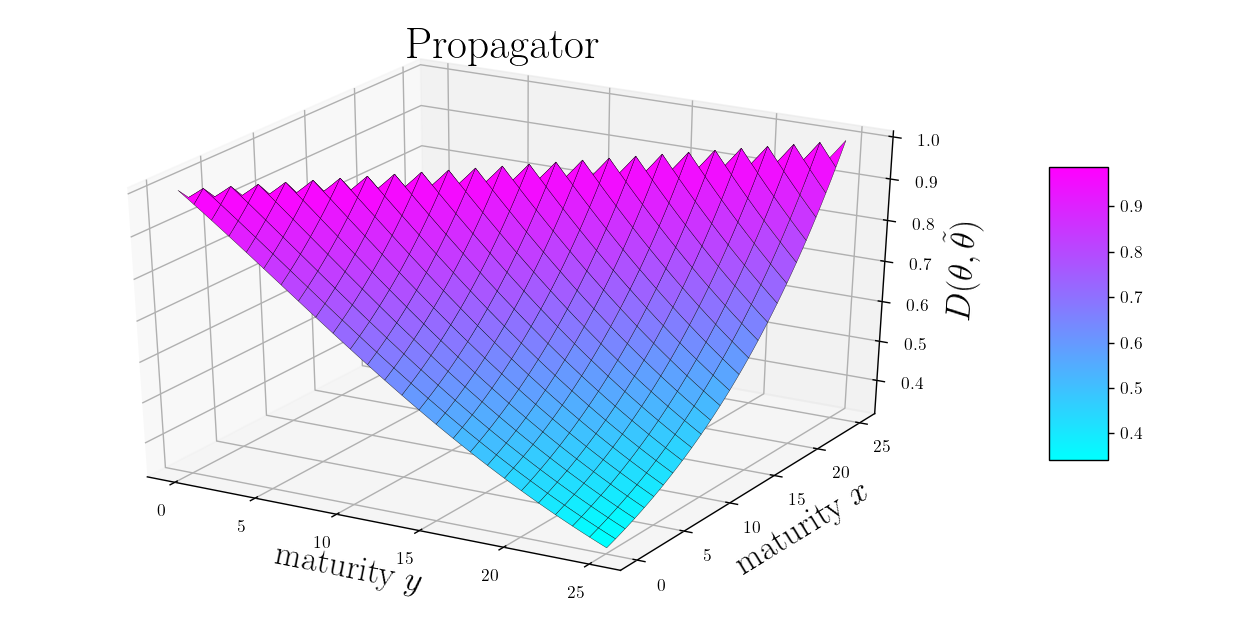

In [296]:
fig = plt.figure(figsize=(10,5))

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_theta

X,Y=np.meshgrid(x,y)

ax.set_xlabel('maturity $y$',size=20)
ax.set_ylabel('maturity $x$',size=20)
ax.set_zlabel(r'$D(\theta,\tilde{\theta})$',size=20)
ax.set_title(r'Propagator',size=25)

surf = ax.plot_surface(X,Y,z, cmap=cm.cool, 
                       Linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Normalized_Propagator_theta_Visualization_tenors', dpi=400)  

In [249]:
def D_theta_TFR(theta1,theta2,T_FR,mu):
    prefactor = mu*T_FR/math.sinh(mu*T_FR)**3
    term1 = math.sinh(mu*(T_FR-theta1))*math.sinh(mu*theta2)*(1+math.sinh(mu*T_FR))**2*step_function(theta1-theta2)
    term2 = math.sinh(mu*(T_FR-theta2))*math.sinh(mu*theta1)*(1+math.sinh(mu*T_FR))**2*step_function(theta2-theta1)
    term3 = math.cosh(mu*T_FR)*(math.sinh(mu*theta1)*math.sinh(mu*theta2)+math.sinh(mu*(T_FR-theta1))*math.sinh(mu*(T_FR-theta2)))
    
    normalization_factor = np.sqrt(prefactor*(math.sinh(mu*(T_FR-theta1))*math.sinh(mu*theta1)*(1+math.sinh(mu*T_FR))**2
                           +math.cosh(mu*T_FR)*(math.sinh(mu*theta1)*math.sinh(mu*theta1)+math.sinh(mu*(T_FR-theta1))*math.sinh(mu*(T_FR-theta1))))*prefactor*(math.sinh(mu*(T_FR-theta2))*math.sinh(mu*theta2)*(1+math.sinh(mu*T_FR))**2
                           +math.cosh(mu*T_FR)*(math.sinh(mu*theta2)*math.sinh(mu*theta2)+math.sinh(mu*(T_FR-theta2))*math.sinh(mu*(T_FR-theta2)))))
    
    return prefactor*(term1+term2+term3)/normalization_factor

z_theta_TFR = np.matrix([[D_theta_TFR(tenors[i],tenors[j],T_FR,0.058) for i in range(len(tenors))] for j in range(len(tenors))])

<IPython.core.display.Javascript object>


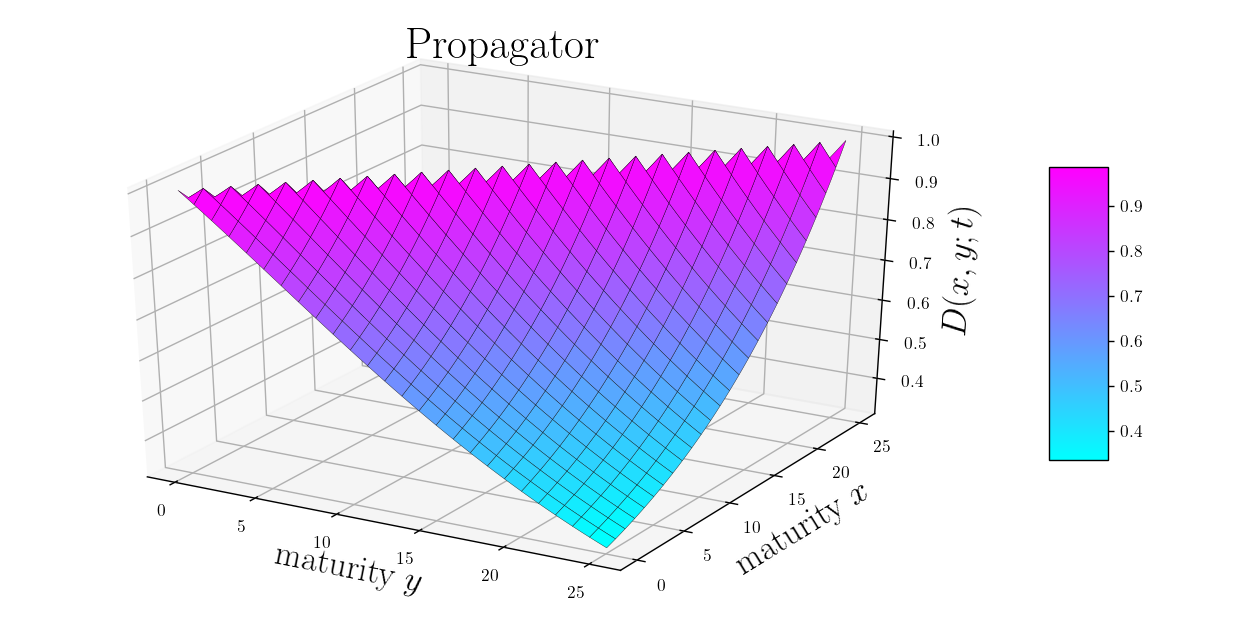

In [297]:
fig = plt.figure(figsize=(10,5))

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_theta_TFR

X,Y=np.meshgrid(x,y)

ax.set_xlabel('maturity $y$',size=20)
ax.set_ylabel('maturity $x$',size=20)
ax.set_zlabel(r'$D(x,y;t)$',size=20)
ax.set_title(r'Propagator',size=25)

surf = ax.plot_surface(X,Y,z, cmap=cm.cool, 
                       Linewidth=0.1, edgecolors='k', lw=0.2)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Normalized_Propagator_thetaTFR_Visualization_tenors', dpi=400)  

We can also calculate the functions $V,\ C$ and $R$ in the field theory. These result in

$$V_{\text{FT}}(\theta)=\sigma(\theta)\sqrt{D(\theta,\theta;t,T_{FR})\epsilon}$$

$$C_{\text{FT}}(\theta)=\frac{\sigma(\theta)D(\theta,\theta_{min};t;T_{FR})}{\sigma(\theta_{min})D(\theta_{min},\theta_{min};t,T_{FR})}-1$$

Suppose $\sigma(\theta)=v(t)e^{a\theta}$

In [255]:
def sigma_HJM_V(theta):
    #Let theta be the index of the tenor in the list "tenors"
    return V[theta]/np.sqrt(1/252)

def sigma_HJM_C(theta, sigma_min):
    return (C[theta]+1)*sigma_min

def sigma_FT_V(theta, t, mu):
    return V[theta]/np.sqrt(D(tenors[theta]+t,tenors[theta]+t,t,mu)*1/252)

def sigma_FT_C(theta,t, mu, sigma_min):
    return (C[theta]+1)*sigma_min*D(tenors[0]+t,tenors[0]+t,t,mu)/D(tenors[theta]+t,tenors[theta]+t,t,mu)

In [298]:
R_HJM = lambda sigma_min : sigma_min*np.sqrt(1/252)


sigma_min_HJM = minimize(lambda s: sum([((r-R_HJM(s))/r)**2/len(R) for r in R]), x0=0.066, method='Nelder-Mead')
sigma_min_HJM

 final_simplex: (array([[0.01258125],
       [0.01252969]]), array([0.91654959, 0.91655008]))
           fun: 0.9165495891089285
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([0.01258125])

In [299]:
def R_FT(theta,sigma_min, mu):
    return sigma_min*np.sqrt(1/252*D_theta(tenors[theta],tenors[theta],mu))*D_theta(tenors[0],tenors[0],mu)/D_theta(tenors[theta],tenors[0],mu)

opt_vals_FT = minimize(lambda x: sum([(R[theta]-R_FT(theta,x[0],x[1])/R[theta])**2/len(R) for theta in range(len(tenors))]), 
                       x0=[0.03,0.08], 
                       method='Nelder-Mead' )

opt_vals_FT

 final_simplex: (array([[0.00027249, 0.18969925],
       [0.00027237, 0.18975005],
       [0.00027309, 0.18963919]]), array([0.00144416, 0.00144416, 0.00144416]))
           fun: 0.0014441580582004072
       message: 'Optimization terminated successfully.'
          nfev: 99
           nit: 52
        status: 0
       success: True
             x: array([0.00027249, 0.18969925])

<IPython.core.display.Javascript object>


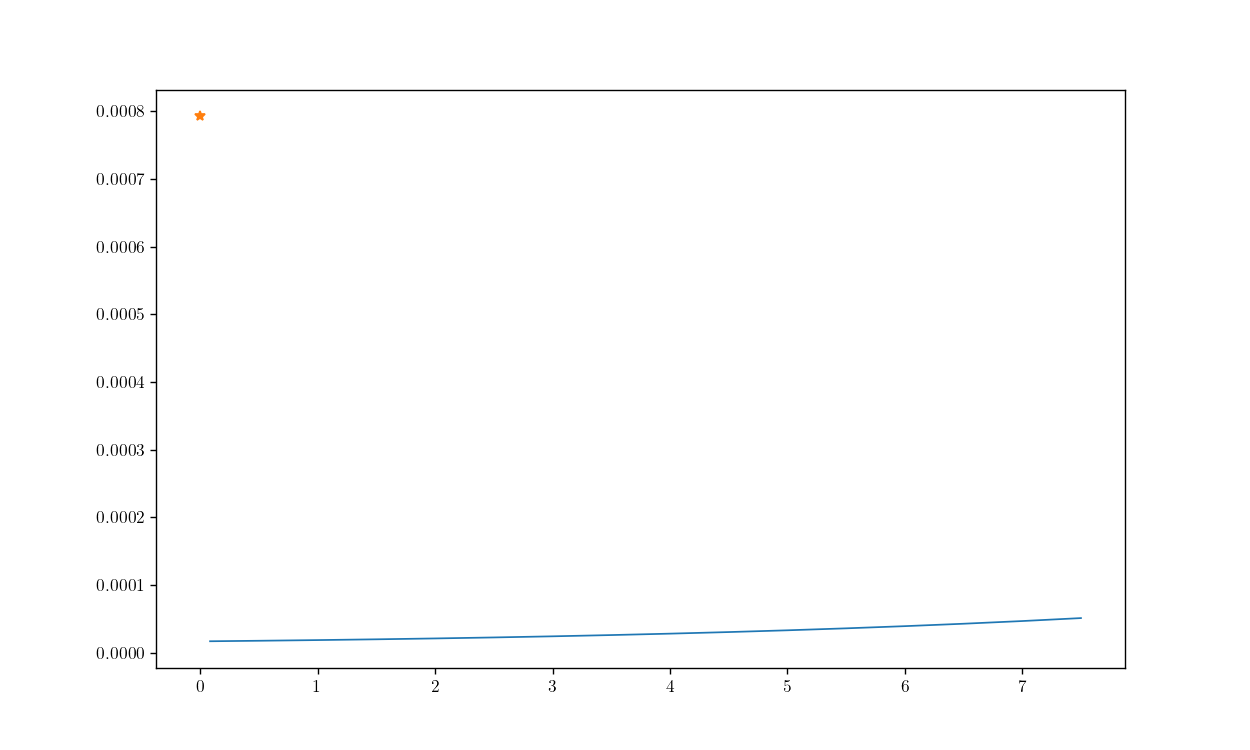

In [300]:
time = 0
mu = 0.0822

fig = plt.figure()

#plt.plot(tenors,R)
plt.plot(tenors[0:16],[R_FT(theta,opt_vals_FT.x[0],opt_vals_FT.x[1]) for theta in range(len(tenors))][0:16])
plt.plot(R_HJM(sigma_min_HJM.x), '*')

plt.show()

<IPython.core.display.Javascript object>


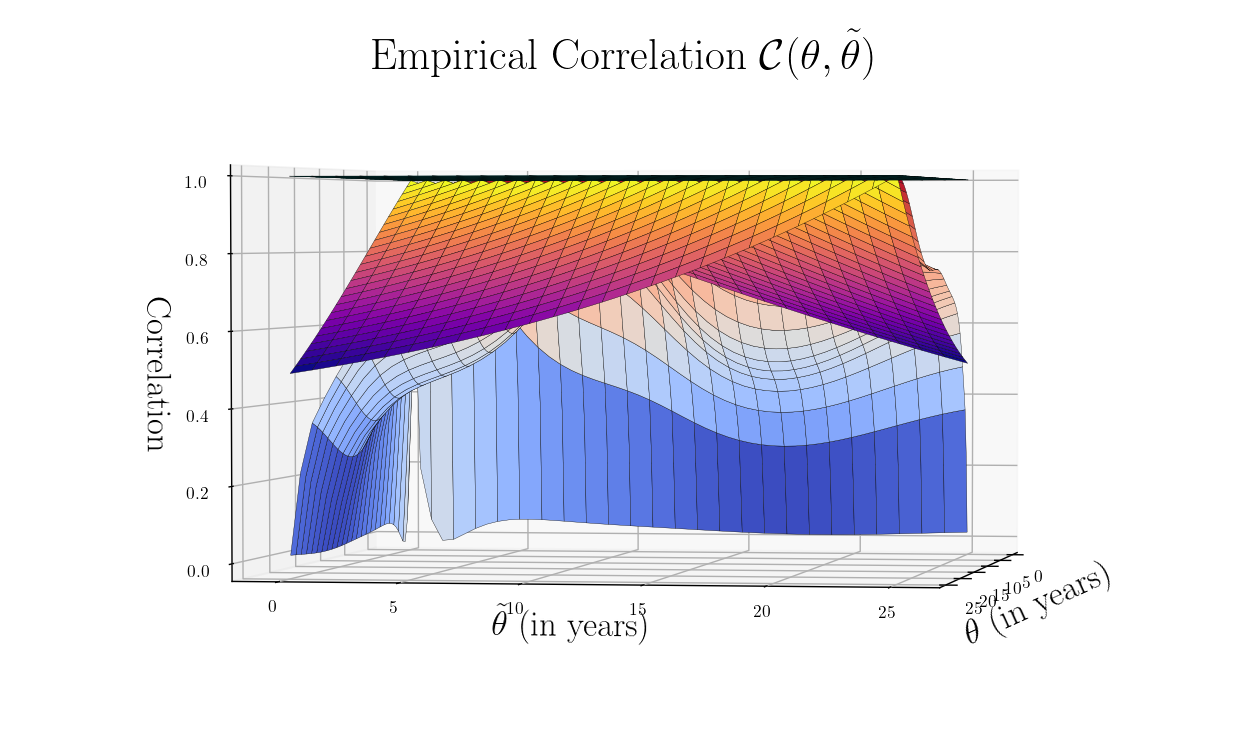

In [301]:
#Set up vectors for surface plot
z_vals = normalized_correlation
y_vals = np.array(tenors)
x_vals = np.array(tenors)

fig = plt.figure()

#fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals

X,Y=np.meshgrid(x,y)

ax.set_xlabel(r'$\theta$ (in years)',size=20)
ax.set_ylabel(r'$\tilde{\theta}$ (in years)',size=20)
ax.set_zlabel('Correlation',size=20)
ax.set_title(r'Empirical Correlation $\mathcal{C}(\theta,\tilde{\theta})$',size=25)

surf = ax.plot_surface(X,Y,z,cmap=cm.coolwarm, 
                       Linewidth=0.1, edgecolors='k', lw=0.2)

surf1 = ax.plot_surface(X,Y, z_vals_normalized, cmap='plasma', Linewidth=0.1, edgecolors='k', lw=0.2)

surf2 = ax.plot_surface(X,Y,HJM_corr,cmap=cm.cool, Linewidth=0.1, edgecolors='k', lw=0.2)


plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

plt.savefig('EmpiricalCorrelation_Comparison_Visualization', dpi=400) 